In [84]:
import os
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [85]:
def load_csf_result_data(optimization, scenario, variant_counts, row_count):
    result_df = None
    for variant_count in variant_counts:
        filepath = f"./optimization-benchmark-results/" \
                   f"results-{optimization}-{scenario}-{variant_count}-{row_count}.csv"
        new_df = pd.read_csv(filepath)
        repeats = new_df.shape[0]
        original_pipeline_median = new_df['original_pipeline'].median()
        new_df['original_pipeline'] = original_pipeline_median
        for column in new_df.columns:
            if column.startswith("analysis_result"):
                new_df[column] = new_df[column].median() / original_pipeline_median
        new_df = new_df.head(1)
        new_df['repeats'] = repeats
        new_df['variant_count'] = variant_count
        if result_df is None:
            result_df = new_df
        else:
            result_df = pd.concat([result_df, new_df], axis=0)
    return result_df

In [86]:
def plot_runtimes(ideal_with_opt, ideal_without_opt,
                  average_with_opt, average_without_opt,
                  worst_with_opt, worst_without_opt,
                  variant_counts, title):

    markersize = 12

    #plt.plot(1.0 / epsilons, adult_means / np.min(adult_means), 'o-', markersize=markersize)

    # plt.plot(variant_counts, np.array(orig), linestyle='dotted', color='grey')
    plt.plot(variant_counts, np.array(ideal_with_opt), color='tab:blue')
    plt.plot(variant_counts, np.array(ideal_without_opt), linestyle='dashed', color='tab:blue')
    plt.plot(variant_counts, np.array(average_with_opt), color='tab:orange')
    plt.plot(variant_counts, np.array(average_without_opt), linestyle='dashed', color='tab:orange')
    plt.plot(variant_counts, np.array(worst_with_opt), color='tab:green')
    plt.plot(variant_counts, np.array(worst_without_opt), linestyle='dashed', color='tab:green')

    #plt.ylim((0.9, 5.999))

    plt.ylabel('rel. overhead to orig.', fontsize=26)
    plt.xlabel('# variants', fontsize=26)
    plt.legend(['ideal w/ opt.', 'ideal w/o opt.',
                'average w/ opt.', 'average w/o opt.',
                'worst w/ opt.', 'worst w/o opt.',], loc='upper left',
               #, title="inspections", title_fontsize=16,
               fontsize=20, ncol=1)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)

    #plt.xticks(variant_counts[1:], rotation=45, fontsize=24)
    plt.xticks(variant_counts, rotation=0, fontsize=24)

    #plt.yscale('log')
    #plt.xscale('log')


    #plt.title(title, fontsize=26)

    plt.gcf().set_size_inches(8, 6)
    plt.tight_layout()

    current_directory = os.getcwd()
    output_directory = os.path.join(current_directory, r'figures')
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    plt.gcf().savefig(f'./figures/{title}.pdf', dpi=300)
    plt.show()

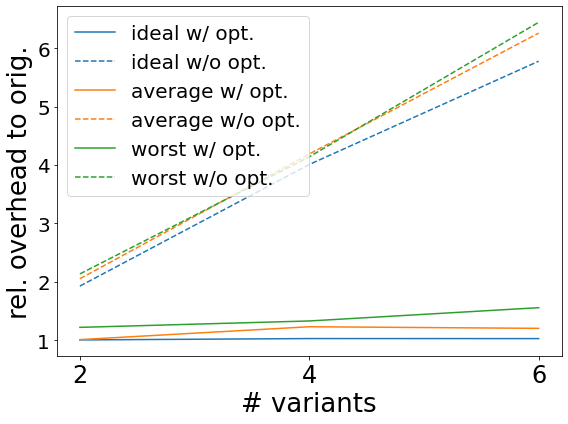

In [87]:
optimization = "common_subexpression_elimination"
variant_counts = [2, 4, 6]
row_count = "2000"
ideal_df = load_csf_result_data(optimization, "ideal", variant_counts, row_count)
average_df = load_csf_result_data(optimization, "average", variant_counts, row_count)
worst_df = load_csf_result_data(optimization, "worst", variant_counts, row_count)
plot_runtimes(ideal_df['analysis_result_with_opt'], ideal_df['analysis_result_without_any_opt'],
              average_df['analysis_result_with_opt'], average_df['analysis_result_without_any_opt'],
              worst_df['analysis_result_with_opt'], worst_df['analysis_result_without_any_opt'],
              variant_counts,
              f"{optimization}_variant_counts")

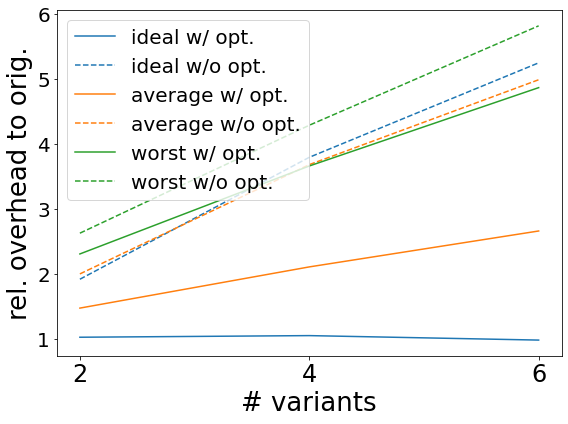

In [89]:
optimization = "projection_push_up"
variant_counts = [2, 4, 6]
row_count = "2000"
ideal_df = load_csf_result_data(optimization, "ideal", variant_counts, row_count)
average_df = load_csf_result_data(optimization, "average", variant_counts, row_count)
worst_df = load_csf_result_data(optimization, "worst", variant_counts, row_count)
plot_runtimes(ideal_df['analysis_result_with_opt_rule'], ideal_df['analysis_result_without_opt_rule'],
              average_df['analysis_result_with_opt_rule'], average_df['analysis_result_without_opt_rule'],
              worst_df['analysis_result_with_opt_rule'], worst_df['analysis_result_without_opt_rule'],
              variant_counts,
              f"{optimization}_variant_counts")
